# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.




# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso. Iremos praticar tarefas básicas de aquisição, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- O arquivo ipynb exportado como html

Para entregar este projeto, vá a [sala de aula](https://coco.udacity.com/nanodegrees/nd111/locale/pt-br/versions/1.0.0/parts/339726/modules/339733/lessons/340886/project) e submeta o seu `.ipynb` e o html, zipados.

# Lembretes

Antes de começarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que você pode ver do lado esquerdo de uma célula de código quando foi executado pela última vez se houver um número dentro das chaves.
- Quando você inicia uma nova sessão do notebook, certifique-se de executar todas as células até o ponto em que você deixou a última vez. Mesmo que a saída ainda seja visível a partir de quando você executou as células em sua sessão anterior, o kernel começa em um estado novo, então você precisará recarregar os dados, etc. em uma nova sessão.
- O ponto anterior é útil para ter em mente se suas respostas não correspondem ao que é esperado nos questionários da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que você esteja trabalhando com as mesmas variáveis e dados que estão em cada fase do questionário.

## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [1]:
import urllib
from bs4 import BeautifulSoup

#Para abrir e ler a página dos arquivos 
url = "http://web.mta.info/developers/turnstile.html"
u = urllib.urlopen(url)
html = u.read()

#Procurando os arquivos para download, para isso foi necessário inspecionar o html e encontrar qual tag 
#representa os arquivos para download 
#Dentro do "body" é preciso analisar as tags <a> e aceesar os "href" aonde estão os links para download dos dados
soup = BeautifulSoup(html, "html.parser")
links = soup.find("div", class_="span-84 last").find_all('a')

#Para verificar se os daods são do mês de junho de 2017:
Dates =["170603", "170610", "170617", "170624"]
for link in links:
    href = link.get("href")
    #print href
    for date in Dates:
        if date in href:
            print date
            urllib.urlretrieve("http://web.mta.info/developers/"+href, "turnstile_"+date+".txt")
            
#OBS: Os download foram para o mesmo diretório do .ipynb

170624
170617
170610
170603


### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [2]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            with open(filename, 'r') as turnstile:
                count =1
                for line in turnstile:
                    if count == 1:
                        count += 1
                        continue
                    else:
                        master_file.write(str(line)+"\n")


In [3]:
filenames = ["turnstile_170624.txt", "turnstile_170603.txt", "turnstile_170610.txt", "turnstile_170617.txt"]
#Determinando o nome do arquivo do output
output_file = "master_turnstile.txt"
#Unindo os arquivos
create_master_turnstile_file(filenames, output_file)

### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [4]:
import pandas

def filter_by_regular(filename):
    
    turnstile_data = pandas.read_table(filename, sep=",")
    #print turnstile_data.head() >>TEST
    turnstile_data = turnstile_data[turnstile_data.DESCn == "REGULAR"]
    return turnstile_data

In [5]:
master_turnstile_reg = filter_by_regular("master_turnstile.txt")

### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly

2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [6]:
import pandas

def get_hourly_entries(df):
    #criar uma nova coluna
    #para cada linha
        #Se existir linha anterior:
            #valor dessa nova coluna nessa linha é a dif dessa para anterior
        #Se não existir anterior ou anteir igual NAN
            #adicionar essa linha como sendo 1
    df["ENTRIESn"].fillna(0, inplace=True)
    df["ENTRIESn_hourly"] = ""
    df["ENTRIESn_shift"] = df.ENTRIESn.shift(1)
    for index, row in df.iterrows():
        if index == 0:
            df.set_value(index, "ENTRIESn_hourly", 1)
          
        else:
            dif = row["ENTRIESn"] - row["ENTRIESn_shift"]
            df.set_value(index, "ENTRIESn_hourly", dif)
    df = df.drop("ENTRIESn_shift", 1) 
    return df

In [7]:
#TESTANDO
import pandas
test_A002 = master_turnstile_reg[master_turnstile_reg["C/A"] == "A002"]
#print test_A002.head()
#test_A002 = pandas.read_table("turnstile_A002(TEST).txt", sep=",")
out_test_A002 = get_hourly_entries(test_A002)
print out_test_A002.head()

C:\Users\User\Anaconda3\envs\py2\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\User\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

    C/A  UNIT       SCP STATION  LINENAME  DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn ENTRIESn_hourly  
0  REGULAR   6224816  2107317               1  
1  REGULAR   6224850  2107322              34  
2  REGULAR   6224885  2107352              35  
3  REGULAR   6225005  2107452             120  
4  REGULAR   6225248  2107513             243  


**DÚVIDA:**Como solucionar o "erro" reportado a cima? ME parece estar funcionando perfeitamente mesmo assim. 

OBS: O próximo exercício também reporta a mesma mensagem.

### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [8]:
import pandas

def get_hourly_exits(df):
    df["EXITSn"].fillna(0, inplace=True)
    df["EXITSn_hourly"] = ""
    df["EXITSn_shift"] = df.EXITSn.shift(1)
    for index, row in df.iterrows():
        if index == 0:
            df.set_value(index, "EXITSn_hourly", 1)
          
        else:    
            dif = row["EXITSn"] - row["EXITSn_shift"]
            df.set_value(index, "EXITSn_hourly", dif)
    df = df.drop("EXITSn_shift", 1) 
    return df

In [9]:
#TESTANDO 02

test2_A002 = master_turnstile_reg[master_turnstile_reg["C/A"] == "A002"]
#print test_A002.head()

out_test2_A002 = get_hourly_exits(test2_A002)
print out_test2_A002.head()

C:\Users\User\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


    C/A  UNIT       SCP STATION  LINENAME  DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn EXITSn_hourly  
0  REGULAR   6224816  2107317             1  
1  REGULAR   6224850  2107322             5  
2  REGULAR   6224885  2107352            30  
3  REGULAR   6225005  2107452           100  
4  REGULAR   6225248  2107513            61  


### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [10]:
#Qual o tipo de dados em análise?
print type(out_test2_A002["TIMEn"][0])

<type 'str'>


In [11]:
#Como é um string é possível acessar os dois primeiro caracteres do string para extrair a hora.
def time_to_hour(time):
    
    hour = int(time[:2])
    return hour

In [12]:
#TESTE
time_test = "25:45:38"
out_time = time_to_hour(time_test)
print out_time, type(out_time)

25 <type 'int'>


## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [13]:
import pandas as pd

filename = "turnstile_data_master_with_weather.csv"

df_master_weather = pd.read_csv(filename, sep=",")

print type(df_master_weather)
print df_master_weather.head(20)
print df_master_weather.tail(20)

<class 'pandas.core.frame.DataFrame'>
    Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0            0  R001  2011-05-01  01:00:00     1  REGULAR              0.0   
1            1  R001  2011-05-01  05:00:00     5  REGULAR            217.0   
2            2  R001  2011-05-01  09:00:00     9  REGULAR            890.0   
3            3  R001  2011-05-01  13:00:00    13  REGULAR           2451.0   
4            4  R001  2011-05-01  17:00:00    17  REGULAR           4400.0   
5            5  R001  2011-05-01  21:00:00    21  REGULAR           3372.0   
6            6  R002  2011-05-01  01:00:00     1  REGULAR              0.0   
7            7  R002  2011-05-01  05:00:00     5  REGULAR             42.0   
8            8  R002  2011-05-01  09:00:00     9  REGULAR             50.0   
9            9  R002  2011-05-01  13:00:00    13  REGULAR            316.0   
10          10  R002  2011-05-01  17:00:00    17  REGULAR            633.0   
11          11  R002  2011

### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

In [14]:
#Testadno a conversão para inteiro
test_rain = df_master_weather
test_rain['rain'] = test_rain['rain'].astype(int)
#print test_rain.head()
#print test_rain.tail()

Para daterminar o número de dias chuvosos é preciso filtrar as datas, para que datas repitidas não sejam contadas mais de uma vez. Ao analisar o arquivo me pareceu que não há erro nos dados, ou seja, todos os dados de chuva para um certo dia são sempre iguais, não existe um dia com dados de chuva igual a 1 e também igual a 0. Mesmo assim, se existir, esse dias será contado como um dia de chuva. 

### Opção 1 (mais simples)

In [15]:
def num_rainy_days(df):
    
    rainy_days = len(df[df.rain == 1].groupby('DATEn'))
    
    return rainy_days

### Opção 2

In [16]:
#def num_rainy_days(df):
#
#    df['rain'] = df['rain'].astype(int)
#    #para cada linha
#        #Se data não existe no dict
#            #criar key e value of rain
#        #Se o dado rain for 1:
#            #altarar o valor da chave para um
#    date_rain = {}
#    for index, row in df.iterrows():
#        if row["DATEn"] not in date_rain.keys():
#            date_rain[row["DATEn"]] = row['rain']
#        elif row['rain'] == 1:
#            date_rain[row["DATEn"]] = row['rain']
#        else:
#            continue
#    #print date_rain
#    #print date_rain.keys(), type(date_rain.keys())
#    values = date_rain.values()
#    rainy_days = sum(values)
#    return rainy_days

In [17]:
#Determinado o número de dias chuvosos do dataframe df_master_weather
rainy_days = num_rainy_days(df_master_weather)
print "Do total de 30 dias do mês 5, ", rainy_days, " dias foram chuvosos."

Do total de 30 dias do mês 5,  10  dias foram chuvosos.


### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).
  
**REFORMULANDO CONFORME ORIENTAÇÃO DA UDACITY (Forúm): ** Calcule a temperatura máxima para dias nublados e não nublados

In [18]:
#Apenas para visualizar os dados que serão analisados
df_master_weather.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0,5.0,50.0,60.0,69.0,0.0,0.0


In [19]:
#Qual p type de dado 'fog'?
type(df_master_weather['fog'][0])

numpy.float64

### Opção 1 (mais simples) 

In [20]:
def max_temp_aggregate_by_fog(df):
    
    max_fog = df.groupby("fog").maxtempi.max()
              
    return max_fog

In [21]:
maxtemp_fog = max_temp_aggregate_by_fog(df_master_weather)
#print type(maxtemp_fog)
print 'Para tempo nublado, a máxima temperatura foi de ', maxtemp_fog[1], ', já para tempo não nublado a temperatura máxima foi de ',maxtemp_fog[0],'.'

Para tempo nublado, a máxima temperatura foi de  81.0 , já para tempo não nublado a temperatura máxima foi de  86.0 .


### Opção 2 - Para dias nublados enão nublados

In [22]:
#def max_temp_aggregate_by_fog(df):
#    max_fog = 0
#    max_not_fog = 0
#    #transformando para type int
#    df['fog'] = df['fog'].astype(int)
#    for index, row in df.iterrows():
#        fog = row['fog']
#        maxtemp = row['maxtempi']
#        if fog == 1:
#            if maxtemp > max_fog:
#                max_fog = maxtemp
#        else:
#            if maxtemp > max_not_fog:
#                max_not_fog = maxtemp
#    return max_fog, max_not_fog

In [23]:
#maxtemp_fog, maxtemp_not_fog = max_temp_aggregate_by_fog(df_master_weather)
#print 'Para tempo nublado, a máxima temperatura foi de ', maxtemp_fog, ', já para tempo não nublado a temperatura máxima foi de ',maxtemp_not_fog,'.'

### *Exercicio 2.4*

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [24]:
#TEST (Entender funcionamento dos dados tipo 'datetime64')
import pandas as pd
from datetime import date
t =pd.Series(['25/04/2014','12/04/2014','2/04/2014','5/04/2014']) 
t1 = pd.to_datetime(t)
print type(t1)
print t1
print t1[0].weekday()

<class 'pandas.core.series.Series'>
0   2014-04-25
1   2014-12-04
2   2014-02-04
3   2014-05-04
dtype: datetime64[ns]
4


In [25]:
import pandas as pd
import datetime as dt
import numpy as np

def avg_weekend_temperature(filename):
    #transformar a coluna DATEn no tipo date e não deixar string
    #Para cada linha do data frame 
        #se é final de semana 
            #Se a data já está no dict
            #acrescentar a lista
    filename['DATEn'] = pd.to_datetime(filename['DATEn'])
    filename['DATEn'] = filename['DATEn'].dt.date
    weekend_temp = {}
    for index, row in filename.iterrows():
        weekday = row['DATEn'].weekday()
        date = row['DATEn']
        if weekday == 5 or weekday == 6: #Se o dia é final de semana
            if date not in weekend_temp.keys(): #Se o dia ainda não foi contabilizado
                weekend_temp[date] = row['meantempi'] #acrescentar o dia e o valor de sua meantempi
                
    mean_temp_weekends = np.mean(weekend_temp.values())  # média dos valores de meantempi para os finais de semana
    
    #print weekend_temp #Apenas para verificacao
    
    return mean_temp_weekends

In [26]:
mean_meantempi = avg_weekend_temperature(df_master_weather)
print "A média de 'mean_tempi' para os finais de semana é de ", mean_meantempi

A média de 'mean_tempi' para os finais de semana é de  65.1111111111


### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [27]:
import pandas as pd
import numpy as np

def avg_min_temperature(filename):
    min_temp_rain = {}
    filename['mintempi'] = filename['mintempi'].astype(float)
    for index, row in filename.iterrows():
        min_temp = row['mintempi']
        rain = row['rain']
        if (rain == 1) and (min_temp > 55):
            date= row['DATEn']
            if date not in min_temp_rain.keys():
                min_temp_rain[date] = min_temp
                            
    #print min_temp_rain #Apenas para verificação
    avg_min_temp_rainy = np.mean(min_temp_rain.values())
    
    return avg_min_temp_rainy

In [28]:
mean_min_temp_rain =  avg_min_temperature(df_master_weather)
print "A média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus é de ", mean_min_temp_rain

A média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus é de  61.25


### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

In [29]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    
    
    plt.figure()
    
    data1 = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1]
    data2 = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0]
    
    bins = range(0,7000,50)
    
    ax = data1.plot.hist(label="Rain", alpha=0.7, bins=bins) 
    ax = data2.plot.hist(label="Not Rain", alpha=0.7, bins=bins, ax=ax) 
    ax.set_title("Entries x Weather")
    ax.set_xlim([-50,7000])
    ax.set_ylim([0,27000])
    ax.legend()
    
    return plt.show()

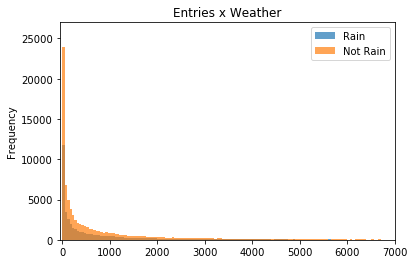

None


In [30]:
print entries_histogram(df_master_weather)

### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: Ambas as distribuição são do tipo Oblíqua inclinadas positivamente, ou seja, a moda está a esquerda da mediana e decaem com o aumento dos valores do eixo X, portanto, ambos os tipos de distribuição apresentam o mesmo comportamento. Porém, existe diferença nas frequências, mostrando que em dias de chuva a utilização cai em magnitude mas as características de utilização são mantidas independentes do dia estar chuvoso ou não.

### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [31]:
import numpy as np

import pandas

def means(turnstile_weather):
    
    with_rain = []
    without_rain =[] 
    for index, row in turnstile_weather.iterrows():
        rain = row['rain']
        entrie = row['ENTRIESn_hourly']
        if rain == 1:
            with_rain.append(entrie)
        else:
            without_rain.append(entrie)
    
    with_rain_mean = np.mean(with_rain)
    without_rain_mean = np.mean(without_rain)
    
    return with_rain_mean, without_rain_mean

Responda as perguntas abaixo de acordo com a saida das suas funções:

1. Qual a média das entradas com chuva?
2. Qual a média das entradas sem chuva?


In [32]:
media_com_chuva, media_sem_chuva = means(df_master_weather)  

print 'A média de entradas com chuva é de ', media_com_chuva, '.'
print ''
print 'A média de entradas sem chuva é de ', media_sem_chuva, '.'

A média de entradas com chuva é de  1105.44637675 .

A média de entradas sem chuva é de  1090.27878015 .


** Resposta **: 

A média de entradas com chuva é de  1105.44637675 .

A média de entradas sem chuva é de  1090.27878015 .

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [33]:
import sys

def mapper():
    
    
    for line in sys.stdin:
       
        line = line.strip()
        line = line.split(',')
        #print line
        
        unit = line[1]
        entries = line[6]
        print unit,'\t',entries



sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [34]:
import sys

def reducer():
    
    last_unit = ''
    total_entries = float(0)
    for line in sys.stdin:
        line = line.strip()
        line = line.split('\t')
        #print line, len(line)
        #break
        unit = line[0]
        entries = line[1]
        #print entries
        
        if unit == 'UNIT ': #First line
            print unit, '  TOTAL ENTRIES'
            continue

        if last_unit == '':
            last_unit = unit        
        elif last_unit == unit:
            total_entries += float(entries)
        else:
            print last_unit,'\t',total_entries
            last_unit = unit
            total_entries = float(entries)

    print unit,'\t',total_entries    

sys.stdin = open('mapper_result.txt')
sys.stdout = open('reducer_result.txt', 'w')
reducer()